In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression , LogisticRegression ,Ridge , Lasso ,ElasticNet
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder , OrdinalEncoder , LabelEncoder 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.svm import  SVR
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error 
from sklearn.model_selection import train_test_split , cross_validate , cross_val_score ,GridSearchCV ,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest ,f_regression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

import warnings

In [3]:
df = pd.read_csv(r"C:\Users\umesh\OneDrive\Desktop\House Price Prediction\data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape

(1460, 81)

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df.isnull().sum().sum()

np.int64(7829)

In [9]:
none_cols = ["Alley","PoolQC","Fence","MiscFeature","FireplaceQu",
             "GarageType","GarageFinish","GarageQual","GarageCond",
             "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]

df[none_cols] = df[none_cols].fillna("None")

In [10]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])
df["MasVnrType"] = df["MasVnrType"].fillna("None")

In [12]:
df.isnull().sum().sum()

np.int64(0)

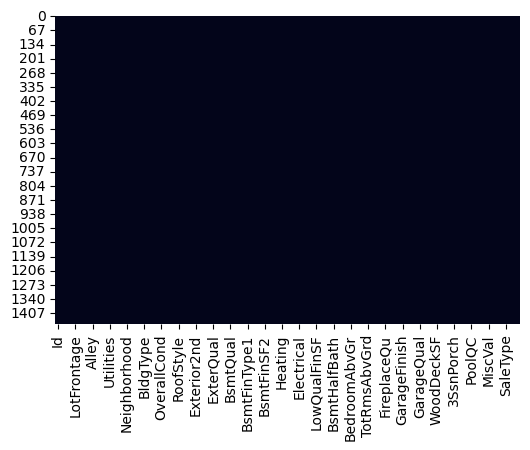

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [14]:
df.duplicated().sum()

np.int64(0)

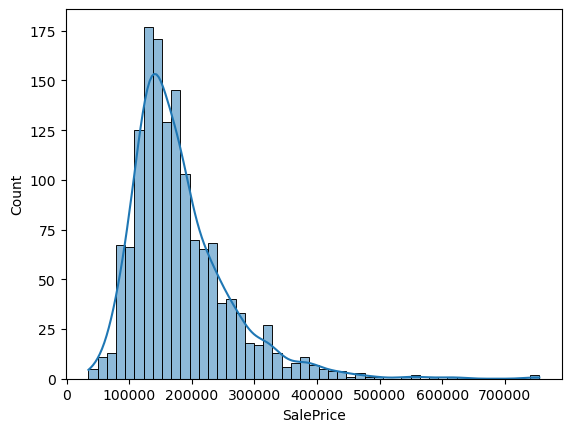

In [15]:
sns.histplot(df['SalePrice'],kde=True)
plt.show()

In [16]:
df['SalePrice'].skew()

np.float64(1.8828757597682129)

In [17]:
df['SalePrice_log'] = np.log1p(df['SalePrice'])
df['SalePrice_log'].skew()

np.float64(0.12134661989685333)

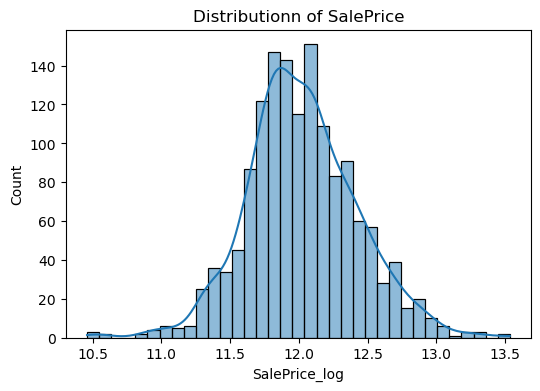

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df['SalePrice_log'],kde=True)
plt.title("Distributionn of SalePrice")
plt.show()

In [19]:
y = df['SalePrice_log']

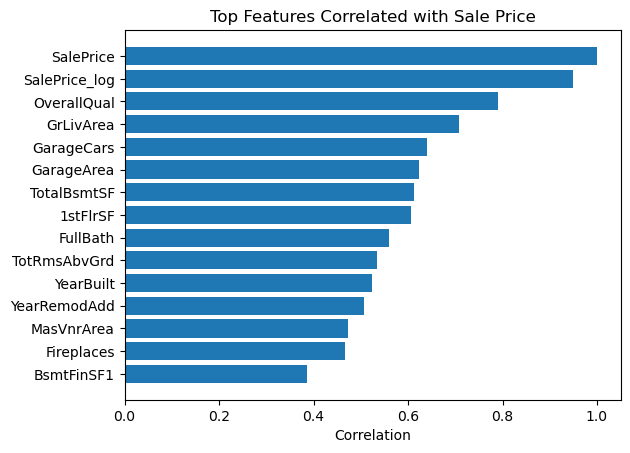

In [20]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr_with_target = numeric_df.corr()["SalePrice"].sort_values(ascending=False)

corr_with_target.head(15)

plt.barh(corr_with_target.head(15).index, corr_with_target.head(15).values)
plt.title("Top Features Correlated with Sale Price")
plt.xlabel("Correlation")
plt.gca().invert_yaxis()
plt.show()

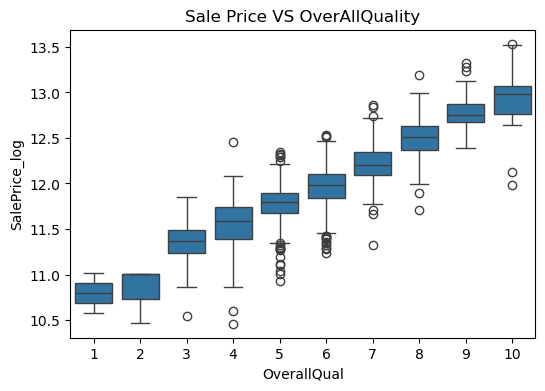

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['OverallQual'],y=df['SalePrice_log'])
plt.title("Sale Price VS OverAllQuality")
plt.show()

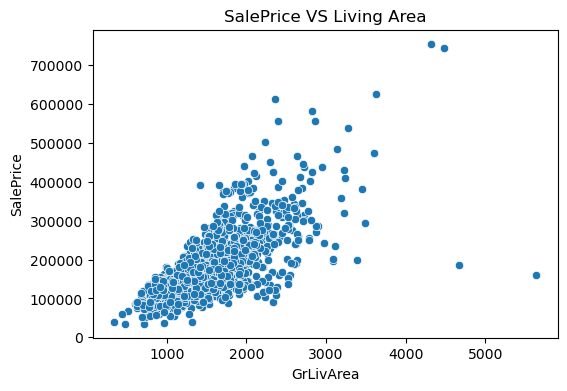

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'])
plt.title("SalePrice VS Living Area")
plt.show()

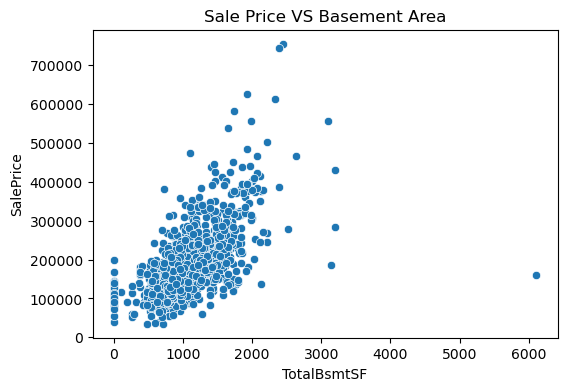

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['TotalBsmtSF'],y=df['SalePrice'])
plt.title("Sale Price VS Basement Area")
plt.show()

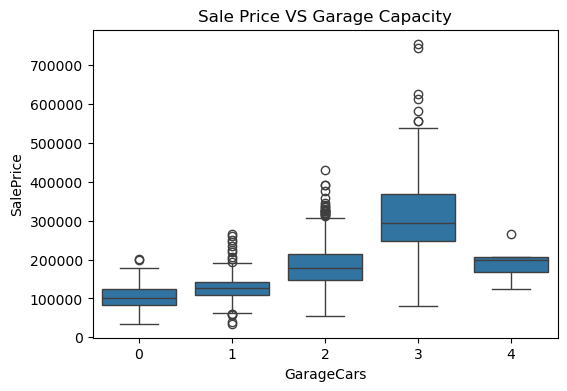

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['GarageCars'],y=df['SalePrice'])
plt.title("Sale Price VS Garage Capacity")
plt.show()

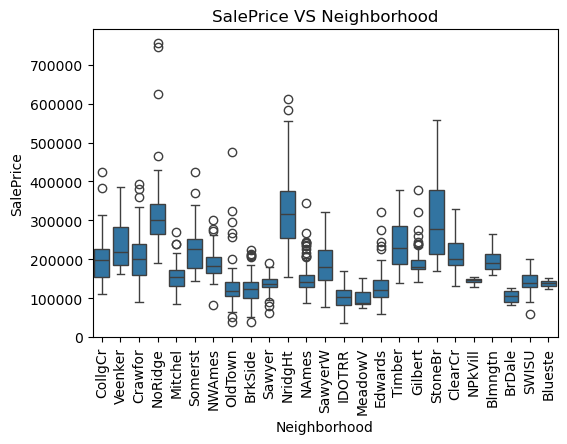

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Neighborhood'],y=df['SalePrice'])
plt.xticks(rotation = 90)
plt.title("SalePrice VS Neighborhood")
plt.show()

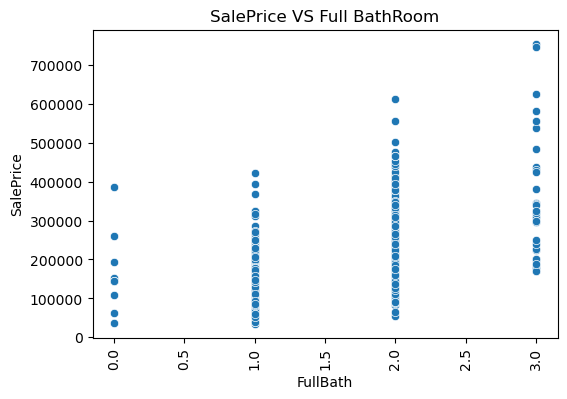

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['FullBath'],y=df['SalePrice'])
plt.xticks(rotation = 90)
plt.title("SalePrice VS Full BathRoom")
plt.show()

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

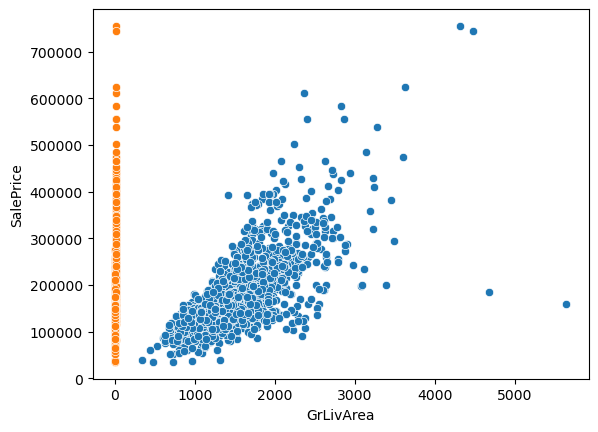

In [27]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)

In [37]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [29]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

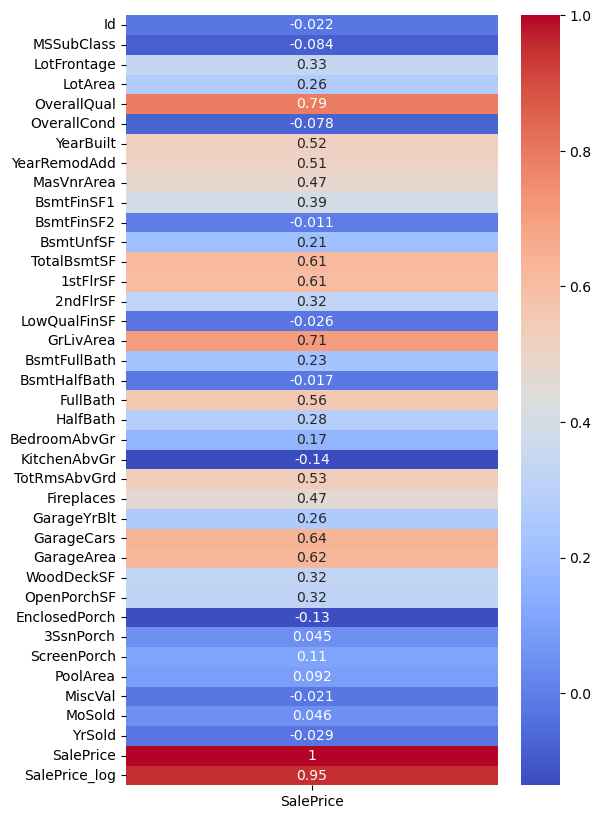

In [30]:
plt.figure(figsize=(6,10))
sns.heatmap(
    df.select_dtypes(include=['int64','float64']).corr()[['SalePrice']],
    annot=True,
    cmap='coolwarm'
)
plt.show()

In [31]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
df['TotalBath'] = (
    df['FullBath'] +
    0.5*df['HalfBath'] +
    df['BsmtFullBath'] +
    0.5*df['BsmtHalfBath']
)
df['TotalPorchSF'] = (
    df['OpenPorchSF'] +
    df['EnclosedPorch'] +
    df['3SsnPorch'] +
    df['ScreenPorch']
)


In [44]:
X = df.drop(["SalePrice","Id", "SalePrice_log"], axis=1)

In [32]:
from scipy.stats import skew

skewed_feats = df[num_cols].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75].index

df[skewed_feats] = np.log1p(df[skewed_feats])

In [38]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


In [34]:
X = df.drop("SalePrice_log",axis=1)
y = df['SalePrice_log']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.9999999984440061
MAE: 8.053366658756124e-06
RMSE: 1.7040116308006547e-05


In [51]:
y = df["SalePrice_log"]
X = df.drop(["SalePrice", "SalePrice_log"], axis=1)

In [46]:
corr = df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)
corr.head(10)

SalePrice_log    1.000000
SalePrice        1.000000
OverallQual      0.817185
TotalSF          0.777297
GrLivArea        0.730254
GarageCars       0.680625
TotalBath        0.673011
GarageArea       0.650888
1stFlrSF         0.608955
FullBath         0.594771
Name: SalePrice, dtype: float64

In [52]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [53]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

In [54]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [56]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [58]:
y_pred_log = model.predict(X_test)

In [59]:
import numpy as np

y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

In [60]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("R2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


R2 Score: 0.9265914052455216
MAE: 14754.789355553434
RMSE: 23729.051143652057


In [61]:
n = X_test.shape[0]
p = X_test.shape[1]

adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print("Adjusted R2:", adj_r2)


Adjusted R2: 0.8963014510992563


In [62]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
print("CV R2 Mean:", cv_r2.mean())


CV R2 Mean: 0.8741354550715321


In [63]:
from sklearn.linear_model import Ridge

ridge_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', Ridge())])

In [65]:
# Predict
y_pred_log_ridge = ridge_model.predict(X_test)

# Inverse log
y_pred_ridge = np.expm1(y_pred_log_ridge)
y_true = np.expm1(y_test)

# Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2_ridge = r2_score(y_true, y_pred_ridge)
mae_ridge = mean_absolute_error(y_true, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_true, y_pred_ridge))

print("Ridge R2:", r2_ridge)
print("Ridge MAE:", mae_ridge)
print("Ridge RMSE:", rmse_ridge)


Ridge R2: 0.9163903976464385
Ridge MAE: 15128.305526745515
Ridge RMSE: 25324.156927823235


In [64]:
from sklearn.linear_model import Lasso

lasso_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Lasso(alpha=0.001))
])

lasso_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', Lasso(alpha=0.001))])

In [66]:
# Predict
y_pred_log_lasso = lasso_model.predict(X_test)

# Inverse log
y_pred_lasso = np.expm1(y_pred_log_lasso)

# Metrics
r2_lasso = r2_score(y_true, y_pred_lasso)
mae_lasso = mean_absolute_error(y_true, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_true, y_pred_lasso))

print("Lasso R2:", r2_lasso)
print("Lasso MAE:", mae_lasso)
print("Lasso RMSE:", rmse_lasso)


Lasso R2: 0.9008615346476927
Lasso MAE: 15735.120272862267
Lasso RMSE: 27575.793169591983


In [67]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge", "Lasso"],
    "R2": [0.9266, r2_ridge, r2_lasso],
    "MAE": [14754.8, mae_ridge, mae_lasso],
    "RMSE": [23729.1, rmse_ridge, rmse_lasso]
})

results


,Model,R2,MAE,RMSE
0,Linear Regression,0.926600,14754.800000,23729.100000
1,Ridge,0.916390,15128.305527,25324.156928
2,Lasso,0.900862,15735.120273,27575.793170


In [68]:
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("MAPE:", mape)


MAPE: 8.783361494816882


In [69]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

In [70]:
# Predict (log)
y_pred_log_rf = rf_model.predict(X_test)

# Inverse log
y_pred_rf = np.expm1(y_pred_log_rf)
y_true = np.expm1(y_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

rf_r2 = r2_score(y_true, y_pred_rf)
rf_mae = mean_absolute_error(y_true, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_true, y_pred_rf))

print("Random Forest R2:", rf_r2)
print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)


Random Forest R2: 0.879663713948546
Random Forest MAE: 17259.195671851867
Random Forest RMSE: 30381.220656452137


In [71]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        random_state=42
    ))
])

gb_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=200,
                                           random_state=42))])

In [72]:
y_pred_log_gb = gb_model.predict(X_test)

y_pred_gb = np.expm1(y_pred_log_gb)

gb_r2 = r2_score(y_true, y_pred_gb)
gb_mae = mean_absolute_error(y_true, y_pred_gb)
gb_rmse = np.sqrt(mean_squared_error(y_true, y_pred_gb))

print("Gradient Boosting R2:", gb_r2)
print("Gradient Boosting MAE:", gb_mae)
print("Gradient Boosting RMSE:", gb_rmse)


Gradient Boosting R2: 0.8840602162192148
Gradient Boosting MAE: 16109.819422298857
Gradient Boosting RMSE: 29821.065742011397


In [73]:
import pandas as pd

results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Ridge",
        "Lasso",
        "Random Forest",
        "Gradient Boosting"
    ],
    "R2": [
        0.9266,
        0.9164,
        0.9008,
        rf_r2,
        gb_r2
    ],
    "MAE": [
        14754.8,
        15128.3,
        15735.1,
        rf_mae,
        gb_mae
    ],
    "RMSE": [
        23729.1,
        25324.1,
        27575.8,
        rf_rmse,
        gb_rmse
    ]
})

results


,Model,R2,MAE,RMSE
0,Linear Regression,0.926600,14754.800000,23729.100000
1,Ridge,0.916400,15128.300000,25324.100000
2,Lasso,0.900800,15735.100000,27575.800000
3,Random Forest,0.879664,17259.195672,30381.220656
4,Gradient Boosting,0.884060,16109.819422,29821.065742


In [74]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(
    model,   # Linear Regression pipeline
    X,
    y,
    cv=5,
    scoring="r2"
)

print("CV R2 Scores:", cv_r2)
print("Mean CV R2:", cv_r2.mean())
print("Std CV R2:", cv_r2.std())


CV R2 Scores: [0.89693333 0.87377861 0.84848709 0.91156494 0.83991331]
Mean CV R2: 0.8741354550715321
Std CV R2: 0.027385509430379658


In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Ridge())
])

param_grid_ridge = {
    "regressor__alpha": [0.01, 0.1, 1, 10, 50, 100]
}

ridge_grid = GridSearchCV(
    ridge_pipe,
    param_grid_ridge,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

ridge_grid.fit(X_train, y_train)

print("Best Ridge Alpha:", ridge_grid.best_params_)
print("Best CV R2:", ridge_grid.best_score_)


Best Ridge Alpha: {'regressor__alpha': 10}
Best CV R2: 0.884950413488327


In [76]:
from sklearn.ensemble import GradientBoostingRegressor

gb_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(random_state=42))
])

param_grid_gb = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__learning_rate": [0.05, 0.1],
    "regressor__max_depth": [3, 4, 5]
}

gb_grid = GridSearchCV(
    gb_pipe,
    param_grid_gb,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

gb_grid.fit(X_train, y_train)

print("Best GB Params:", gb_grid.best_params_)
print("Best CV R2:", gb_grid.best_score_)


Best GB Params: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 300}
Best CV R2: 0.8901441351679021


In [77]:
best_gb = gb_grid.best_estimator_

y_pred_log = best_gb.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

print("Tuned GB R2:", r2_score(y_true, y_pred))
print("Tuned GB MAE:", mean_absolute_error(y_true, y_pred))
print("Tuned GB RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))


Tuned GB R2: 0.8853307345898391
Tuned GB MAE: 15928.185797961034
Tuned GB RMSE: 29657.219553330575


In [78]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("CV Mean R2:", cv_scores.mean())
print("CV Std:", cv_scores.std())


CV Mean R2: 0.8741354550715321
CV Std: 0.027385509430379658


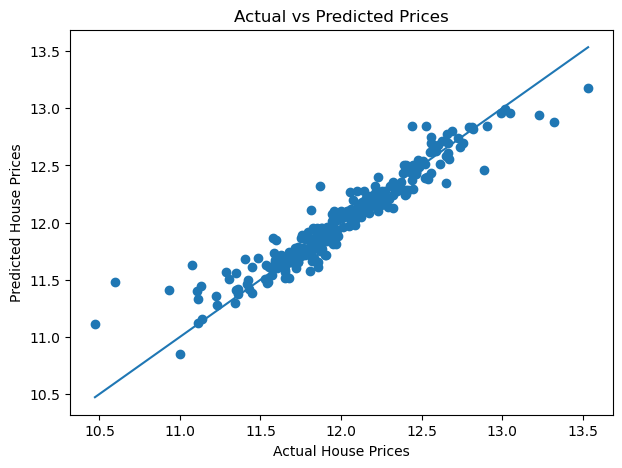

In [79]:
y_pred = best_gb.predict(X_test)

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.show()

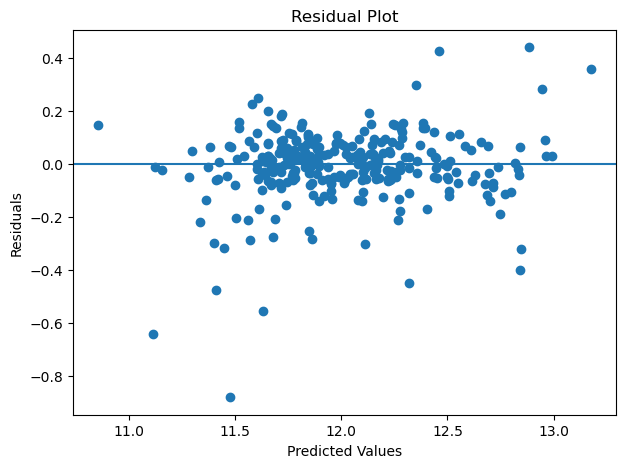

In [81]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()